## <font color ='Black'> Project Challenge: Recommender system for the Amazon food data!

by 
* Jiafei Xia (s213084)
* Malthe Andreas Lejbølle Jelstrup (s184291)
* Mathias Sofus Hovmark (s173853)
* Frederik Sandström Ommundsen (s183951)
* Haimi Qiu (s212650) </font>


---
<a id='intro'></a> 

## Part 1: Introduction

In this project we will be working with Amazon review data for "groceries" and "gourmet food". The dataset was obtained through https://nijianmo.github.io/amazon/index.html and spans a period of 18 years from 2000-2018. The main objective of the project is to build a recommender system for recommending products to users. First, a brief overview of the data will be given and the preliminary cleaning steps will be presented. Then, the specific research questions that will be explored in the report will be presented.

The dataset contains approximately 5.074.160 reviews of product from the 'groceries' and 'gourmet food' sections on Amazon. We have selected a subset of 153619 reviews covering 4092 unique products. A total of 73632 unique users have reviewed products in the subset of the data. Tables 1 and 2 show descriptive statistics including missing values for the datasets features. The features included in the dataset are as follows:

**Features**
* **reviewerID** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* **asin** - ID of the product, e.g. 0000013714
* **reviewerName** - name of the reviewer
* **vote** - number of people who have indicated that the given review was 'helpful'
* **reviewText** - the full review text
* **overall** - the rating of the product (from 1-5, discrete values)
* **summary** - a summary of the review as provided by the user who wrote the review (i.e. a review 'title')
* **reviewTime** - time and date of the review
* **image** - images that users post after they have received the product
* **verified** - a feature indicating whether the review comes from an Amazon account that has previously purchased this product
* **price** - the price of the product the review concerns
* **main_cat** - the main overall category each product has been assigned to by Amazon
* **bottomcat** - the most specific category each product has been assigned to

---
<a id='dataprep'></a>

## Part 2: Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<a id='load'></a>

### 2.1: Load and present basic information of the dataset

In [4]:
df=pd.read_csv('merged_df.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,bottomcat,price,main_cat
0,0,0,5,SAND,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN,Black,12.98,Grocery
1,1,1,5,SAND,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN,Black,12.98,Grocery
2,2,2,5,SAND,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN,Black,12.98,Grocery
3,3,3,5,SAND,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN,Black,12.98,Grocery
4,4,4,5,SAND,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN,Black,12.98,Grocery


In [5]:
#Splitting the datestamp into day/year/month and seasons
df['Date'] = pd.to_datetime(df.reviewTime.values)
df['year'] = df.Date.apply(lambda x: x.year)
df['day'] = df.Date.apply(lambda x: x.weekday())
df['month'] = df.Date.apply(lambda x: x.month)
bins = ["Winter", "Spring", "Summer", "Fall"]
df['season'] = df.month%12 //3
df['season'] = df['season'].apply(lambda x : bins[x])
# dropping the columns which has no impact regarding the research questions
df=df.drop(columns=['unixReviewTime', 'image', 'reviewerName','Date'])

In [6]:
unique=np.array([])
maxunique=np.array([])
minunique=np.array([])
meancounts=np.array([])
stdcounts=np.array([])
missingcounts=np.array([])
mainds=df
categorical = ['reviewerID', 'asin', 'reviewText', 'verified', 'summary', 'year', 'bottomcat', 'main_cat']

for i in categorical:
    unique=np.append(unique, len(mainds[i].unique()))
    maxunique=np.append(maxunique, {mainds[i].value_counts().idxmax() : mainds[i].value_counts().max()})
    minunique=np.append(minunique, {mainds[i].value_counts().idxmin() : mainds[i].value_counts().min()})
    meancounts=np.append(meancounts, mainds[i].value_counts().mean())
    stdcounts=np.append(stdcounts, mainds[i].value_counts().std())
    missingcounts=np.append(missingcounts, len(mainds[mainds[i].isnull()]))

    
test=pd.DataFrame([unique, maxunique, minunique, meancounts, stdcounts, missingcounts]).T
test.index=categorical
test.columns=['Unique values', 'Most frequent category (N)', 'Least frequent category (N)',
             'Mean frequency per category', 'SD', 'Number of missing values']
test['Unique values']=test['Unique values']-(test['Number of missing values']>0).astype(int)
test['Description']=['Reviewer identifier', 'Product ID (identical products have same ID)', 'Full review text for product',
                     '1 if reviewer has bought product, 0 otherwise','The chosen title for the user''s review','Year of review',
                    'Most specific product category','Amazon''s identified overall category']
print("* Month will be treated as nominal")
table1=test
table1

* Month will be treated as nominal


,Unique values,Most frequent category (N),Least frequent category (N),Mean frequency per category,SD,Number of missing values,Description
reviewerID,73632.0,{'A1LACH6MLQWZ': 100},{'A2VUSJVH0G4RLZ': 1},2.086308,2.107482,0.0,Reviewer identifier
asin,4092.0,{'B0001LO3FG': 2919},{'B000089D9T': 1},37.5413,116.838905,0.0,Product ID (identical products have same ID)
reviewText,134261.0,{'good': 521},{'I bought this as a Christmas gift for my boy...,1.14378,3.050194,54.0,Full review text for product
verified,2.0,{'SAND': 132387},{'FALSK': 21232},76809.5,78598.454263,0.0,"1 if reviewer has bought product, 0 otherwise"
summary,87225.0,{'Five Stars': 28342},{'Processed with alkali.': 1},1.760917,97.411606,23.0,The chosen title for the users review
year,18.0,{2015: 33254},{2000: 1},8534.388889,11168.49506,0.0,Year of review
bottomcat,606.0,{'Green': 11476},{'Bagel Chips': 1},253.4967,678.11577,0.0,Most specific product category
main_cat,9.0,{'Grocery': 146511},{'Pet Supplies': 2},17068.777778,48572.954058,0.0,Amazons identified overall category


In [7]:
minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray = [np.array([]) for i in range(8)]

continuous = ['vote', 'price', 'review_length', 'overall']

mainds['vote']=mainds['vote'].astype(float)
mainds['price']=mainds['price'].astype(float)
mainds['review_length'] = mainds.reviewText.map(str).apply(len)
mainds['review_length']=mainds['review_length']
mainds['overall']=mainds['overall'].astype(float)

from scipy import stats
from matplotlib import pyplot as plt

for i in continuous:
    minarray=np.append(minarray, mainds[i].min())
    maxarray=np.append(maxarray, mainds[i].max())
    meanarray=np.append(meanarray, mainds[i].mean())
    stdarray=np.append(stdarray, mainds[i].std())
    medianarray=np.append(medianarray, mainds[i].median())
    zscore = stats.zscore(mainds[i])
    outliersarray=np.append(outliersarray, len(mainds[np.abs(zscore)>3]))
    missingarray = np.append(missingarray, len(mainds[mainds[i]==0]))
    zeroarray = np.append(zeroarray, len(mainds[np.isnan(mainds[i])]))
    
    #labels, counts = np.unique(mainds[i])
    
    #ax=sns.kdeplot(data=mainds, x=i)
    #ax.set_xlim(mainds[i].min(), mainds[i].max())
    #plt.show()
    
testc=pd.DataFrame([minarray, maxarray, meanarray, stdarray, medianarray, outliersarray, missingarray, zeroarray]).T
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
testc.index=continuous
testc.columns=['Min', 'Max', 'Mean', 'SD', 'Median', 'No. of extreme outliers (+/- 3 SD)', 'No. missing values', 'No. zero values']
testc['Variable type']=['Number of votes received by review', 'Price of product reviewed', 'length of review in words', 'rating given by review']
print("Most variables can be discretized or treated as nominal depending on distribution/research question")
table2=testc
table2

Most variables can be discretized or treated as nominal depending on distribution/research question


,Min,Max,Mean,SD,Median,No. of extreme outliers (+/- 3 SD),No. missing values,No. zero values,Variable type
vote,2.0,2088.00,7.229112,24.375486,3.00,0.0,0.0,130089.0,Number of votes received by review
price,1.3,590.79,22.377220,15.686123,20.04,0.0,0.0,45053.0,Price of product reviewed
review_length,1.0,11665.00,228.384497,344.660470,129.00,2680.0,0.0,0.0,length of review in words
overall,1.0,5.00,4.473366,1.044137,5.00,6491.0,0.0,0.0,rating given by review


---
<a id='insiExpl'></a>

## Part 3: Insight Exploration


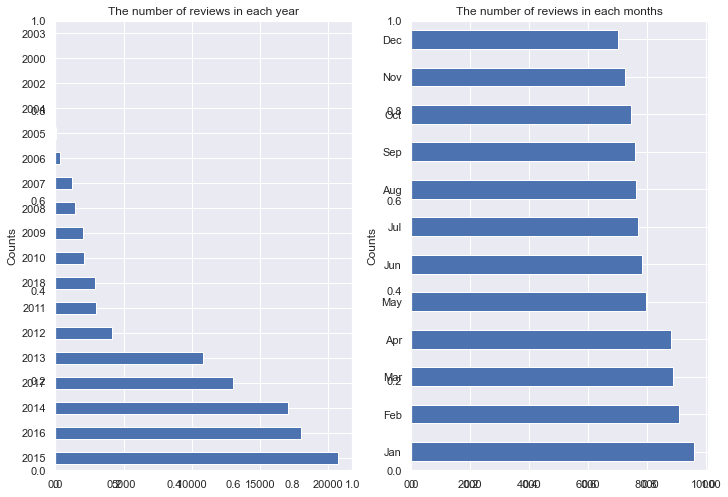

In [23]:
fig, ax = plt.subplots(1,2)

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

ax[0]= df['year'].value_counts().plot(kind='barh',ax=ax1, title="The number of reviews in each year",ylabel="Years", xlabel="Counts")
ax[1]=df['month'].value_counts().plot(kind='barh',ax=ax2, title="The number of reviews in each months",ylabel="Years", xlabel="Counts")
month_starts = range(0,12)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 

ax2.set_yticks(month_starts)
ax2.set_yticklabels(month_names)
plt.show()

Most of the reviews (86%) are from verified users meaning that the writer of the review should in principle have bought the product. This verification process is in place to avoid fake reviews. Instead of removing the 'not verified' reviews we will keep them for later investigation of whether the review verification process is of importance for our recommender system.

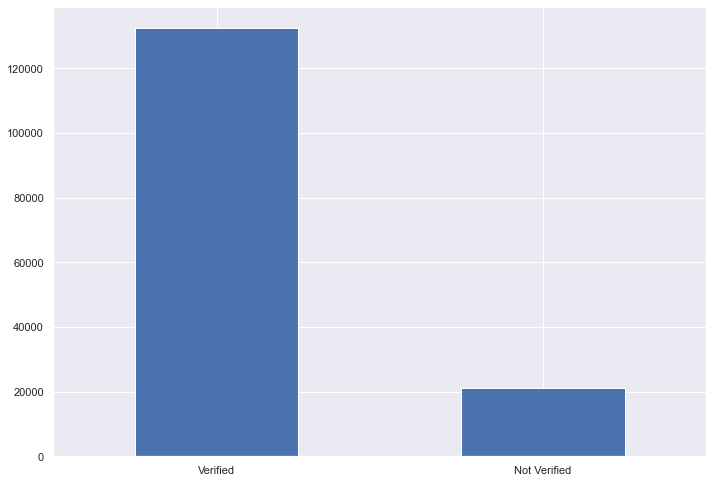

In [17]:
#true means the reviews where the custmomer bought the product
df['verified'].value_counts().plot(kind='bar')
plt.xticks([0,1], ["Verified", "Not Verified"], rotation=0)
plt.show()

Looking at the distribution of reviews and ratings shows a heavy-right skew - most users only review very few products (1-3), most products only receive very few reviews (1-3), the review texts are typically short, and an overweight of reviews contain the most positive rating (5).

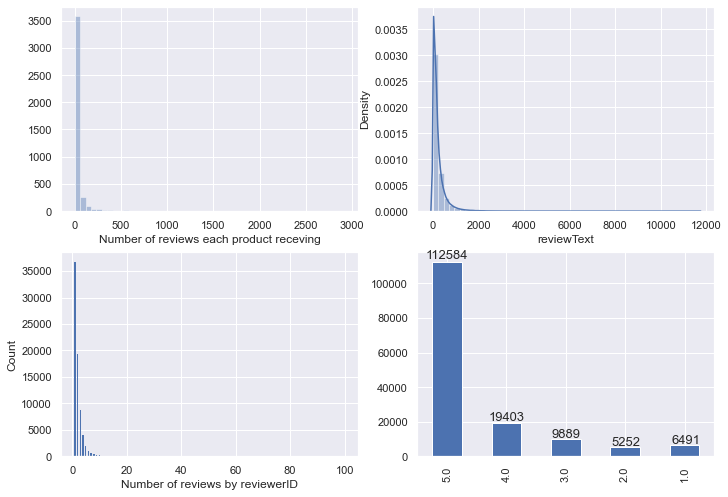

In [18]:
fig, ax = plt.subplots(2,2)
sns.distplot(df.groupby("asin")["overall"].count().rename("Number of reviews each product receving"),
             kde=False, hist=True, ax=ax[0,0])

review_length = df.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])

sns.histplot(df.groupby("reviewerID")["overall"].count().rename("Number of reviews by reviewerID"),
             ax=ax[1,0])

for patch in ax[1,0].patches :
    current_width = patch.get_width()
    new_value = 0.5
    diff = current_width - new_value
    # we change the bar width
    patch.set_width(new_value)
    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
    patch.set_alpha(1)
    
ax[1,1] = df.overall.value_counts().sort_index(ascending=False).plot(kind="bar")
ax[1,1].get_xticks
ax[1,1].set_xticks(ax[1,1].get_xticks(), rotation=0, size=15)
for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)

Likewise, most reviews only receive between 1 and 5 'votes' indicating that another user found the review helpful, the review with the most votes got 2088 upvotes!

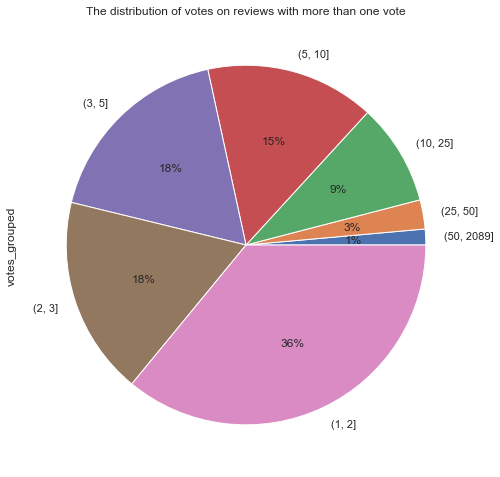

In [19]:
temp=df.copy()
bins = [1,2,3,5,10,25,50,int(temp.vote.max())+1]
temp['votes_grouped'] = pd.cut(temp['vote'],bins=bins)
temp.votes_grouped.value_counts().sort_index(ascending=False).plot(kind="pie",autopct='%.0f%%')
plt.title("The distribution of votes on reviews with more than one vote")
plt.show()


<a id='intro'></a> 

##  Part 4: Data Cleaning

The outliers will be remove in the section below and the same plots as in section 3 will be shown.

In [20]:
# Extreme is defined as more than 3 standard deviations from the mean
# Remove asins (products) with extreme number of reviews
asin_count = df.groupby("asin")["overall"].count()
asin_mean, asin_std = asin_count.mean(), asin_count.std()
banned_asin = asin_count[asin_count > asin_mean + asin_std * 3].index

# Remove reviewers that have made an extreme number of reviews
reviewer_count = df.groupby("reviewerID")["overall"].count()
reviewer_mean, reviewer_std = reviewer_count.mean(), reviewer_count.std()
banned_reviewer = reviewer_count[reviewer_count > reviewer_mean + reviewer_std * 3].index

# Remove reviews with an extremely long text
review_mean, review_std = review_length.mean(), review_length.std()
banned_review_index = review_length[review_length > review_mean + review_std * 3].index

df.drop(banned_review_index, inplace=True)
df = df[~df.asin.isin(banned_asin) & ~df.reviewerID.isin(banned_reviewer)]

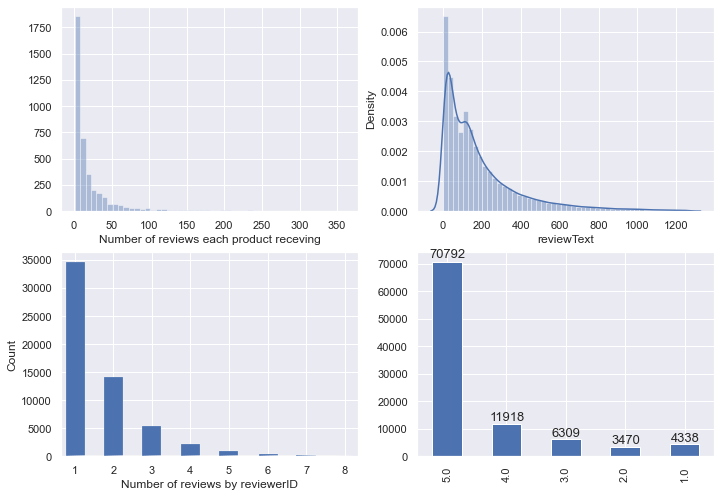

In [21]:
fig, ax = plt.subplots(2,2)
sns.distplot(df.groupby("asin")["overall"].count().rename("Number of reviews each product receving"),
             kde=False, hist=True, ax=ax[0,0])

review_length = df.reviewText.map(str).apply(len)
sns.distplot(review_length, ax=ax[0,1])

sns.histplot(df.groupby("reviewerID")["overall"].count().rename("Number of reviews by reviewerID"),
             ax=ax[1,0])

for patch in ax[1,0].patches :
    current_width = patch.get_width()
    new_value = 0.5
    diff = current_width - new_value
    # we change the bar width
    patch.set_width(new_value)
    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
    patch.set_alpha(1)
    
ax[1,1] = df.overall.value_counts().sort_index(ascending=False).plot(kind="bar")
ax[1,1].get_xticks
ax[1,1].set_xticks(ax[1,1].get_xticks(), rotation=0, size=15)
for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005 + (p.get_width()/2), p.get_height() * 1.005 +1000), ha="center", size=13)

Comparing the above plots with the ones in section 3 it is clearly visible that the outliers have been removed and that the rows have been reduced. Especially the reviewText is less right skewed.


<a id='intro'></a> 

## Part 5: <font color = 'black'> Research Questions </font>

#### We've spoken about recommending based on 3 factors
- Products reviewed by reviewers that have similar historic reviews to user.
- Products that have reviewtext that "resonate" with "user profile".
- Products that have been reviewed within the (yearly, seasonal, monthly, weekly) timeframe when a user is purchasing.
- Also related to time. Is there a sequence that users follow? basic tea > medium tea > advanced "special" tea
- The same as above, but on a product level meaning which products are highly likely to be bought before/after a given product.
- Maybe working with survival analysis and predicting the next purchase of a reviewer. (for the benefit of logistic planning)
#### Does a recommendation system improve when only "verified" reviews are considered?
#### Does considering "helpful votes" improve the recommendation engine? 


